## Section 5. Your First Algorithm: k-Nearest Neighbors (KNN)

To kick off your journey, we'll start with the **k-Nearest Neighbors (KNN)** algorithm. It's often called a **"lazy learner"** because it doesn't really "train" a model in the traditional sense; it just memorizes the training data.

### How a Standard KNN Works: The Social Rule

Imagine you want to classify a new student (the new data point) into one of several social groups (the classes) based on their hobbies (the features).

1.  **k is the "Number of Friends":** You first choose a value for **$k$** (a common choice is $k=3$ or $k=5$). This is the number of neighbors the algorithm will look at.
2.  **Find the Nearest Neighbors:** When a new data point comes in, the algorithm calculates the **distance** (usually Euclidean distance, like measuring a straight line) between the new point and **every** point in the training data.
3.  **Vote:** It identifies the $k$ points closest to the new point.
4.  **Classify:** The new point is assigned the **class (label)** that is most common among its $k$ nearest neighbors. It's a majority vote!


<center>
<img src="https://miro.medium.com/v2/resize:fit:1200/0*OltO4Txr-D0lPWNL.png" alt="Pandas Illustration" width="600">
</center>



| Concept | KNN Analogy | Description |
| :--- | :--- | :--- |
| **New Sample** | The new student. | The data point to be classified. |
| **$k$ Value** | Number of closest friends to ask. | The number of nearest data points the algorithm considers. |
| **Distance Metric** | How similar their hobbies are. | The mathematical function used to measure the similarity (distance) between points. |
| **Prediction** | The most popular social group among those $k$ friends. | The result of the majority vote. |

## Steps of standard KNN Algorithm:


- Step-1: Select the number K of the neighbors
- Step-2: Calculate the Euclidean distance of K number of neighbors
- Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.
- Step-4: Among these k neighbors, count the number of the data points in each category.
- Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.
- Step-6: Our model is ready.

<center>
<img src="https://miro.medium.com/v2/resize:fit:1400/0*34SajbTO2C5Lvigs.png
" alt="Pandas Illustration" width="600">
</center>


**Key takeaway:** KNN is simple, powerful, and easy to interpret, but choosing the right $k$ and calculating all those distances can make it slow with very large datasets.

### **Next Steps:**
In the code cell below, we will perform the full **5-step workflow** using a simple **Classification** algorithm to predict the species of a flower based on its measurements!


In [ ]:
# --- STEP 1: Import Libraries and Load Data ---
print("--- STEP 1: Loading Data ---")
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the famous Iris flower dataset (built-in classification dataset)
iris = load_iris(as_frame=True)  # Load as DataFrame for clarity
data = iris.frame  # includes both features and target columns

# Display the first few rows to understand the data
print("First 5 data samples:")
print(data.head())
print("-" * 40)

--- STEP 1: Loading Data ---
First 5 data samples:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
----------------------------------------


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


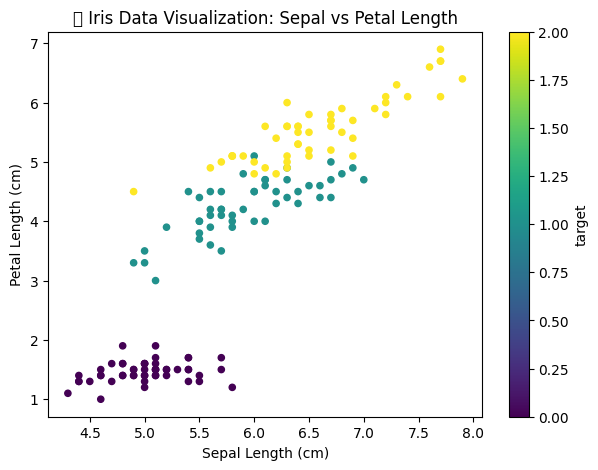

In [ ]:
# --- Optional Visualization: Exploring the Iris Data ---

# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Scatter plot colored by target (species)
df.plot(kind='scatter',
        x='sepal length (cm)',
        y='petal length (cm)',
        c='target',
        colormap='viridis',
        figsize=(7, 5))

plt.title('🌸 Iris Data Visualization: Sepal vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

In [ ]:

# --- STEP 2: Define Features (X) and Label (y) ---
# X (Features): The measurements used for prediction
X = data.drop(columns=['target'])
# y (Label): The thing we want to predict (flower species, coded 0, 1, or 2)
y = data['target']

print(f"Features (X) shape: {X.shape}")
print(f"Label (y) shape: {y.shape}")
print("-" * 40)


# --- STEP 3: Split Data for Training and Testing ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Training Samples (for E - Experience): {len(X_train)}")
print(f"Testing Samples (for P - Performance check): {len(X_test)}")
print("-" * 40)


# --- STEP 4: Train the Model (The Learning Step) ---


# 1. Choose the Model (Algorithm)
model = KNeighborsClassifier(n_neighbors=3)  # Using 3 nearest neighbors


# 2. Train the Model (learn from training data)
print("Training the K-Nearest Neighbors model on the Training Set...")
model.fit(X_train, y_train)
print("Training complete! Model has learned patterns.")
print("-" * 40)



# --- STEP 5: Make Predictions and Evaluate ---
y_pred = model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)

print(f"First 5 Actual Labels (y_test):   {y_test.values[:5]}")
print(f"First 5 Model Predictions (y_pred): {y_pred[:5]}")
print("-" * 40)
print(f"Overall Model Accuracy on Test Data (Performance P): {knn_accuracy:.2f}")

# A result close to 1.00 (or 100%) indicates a highly successful model!


Features (X) shape: (150, 4)
Label (y) shape: (150,)
----------------------------------------
Training Samples (for E - Experience): 105
Testing Samples (for P - Performance check): 45
----------------------------------------
Training the K-Nearest Neighbors model on the Training Set...
Training complete! Model has learned patterns.
----------------------------------------
First 5 Actual Labels (y_test):   [1 0 2 1 1]
First 5 Model Predictions (y_pred): [1 0 2 1 1]
----------------------------------------
Overall Model Accuracy on Test Data (Performance P): 1.00


In [ ]:
# --- BONUS: Train, Predict, and Evaluate Decision Tree (for comparison) ---

# 1. Initialize the Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)

# 2. Train the Model (This involves learning complex rules)
print("Training Decision Tree Model...")
dt_model.fit(X_train, y_train)

# 3. Make Predictions and Evaluate
dt_y_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)

print(f"Decision Tree Model Accuracy: {dt_accuracy:.2f}")
print("-" * 40)


# --- Final Comparison ---
print("Model Comparison:")
print(f"KNN (k=5) Performance: {knn_accuracy:.2f}")
print(f"Decision Tree Performance: {dt_accuracy:.2f}")

# The results show which model performed better on this specific task!